- This is a regression problem hence activation function of output layer is linear.

In [185]:
import pandas as pd
import numpy as np

In [186]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [187]:
print(df.shape)
df.head()

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- GRE Scores ( out of 340 )

- TOEFL Scores ( out of 120 )

- University Rating ( out of 5 )

- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

- Undergraduate GPA ( out of 10 )

- Research Experience ( either 0 or 1 )

- Chance of Admit ( ranging from 0 to 1 )


In [188]:
# Checking for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [189]:
# Duplicated rows

df.duplicated().sum()

0

In [190]:
df.drop(columns= df.columns[:1], axis = 1, inplace=True)

In [191]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [192]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [193]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [194]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [195]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=.2, random_state=42)

- We'll use min-max scaling as upper bound and lower bound are given for each feature.

In [196]:
xTrain

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [197]:
xTest

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
86,315,106,3,4.5,3.5,8.42,0
75,329,114,2,2.0,4.0,8.56,1
438,318,110,1,2.5,3.5,8.54,1


In [198]:
yTrain

249    0.77
433    0.71
19     0.62
322    0.72
332    0.75
       ... 
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: Chance of Admit , Length: 400, dtype: float64

In [199]:
yTest

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit , Length: 100, dtype: float64

## Scaling

In [200]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

xTrainScaled = scale.fit_transform(xTrain)
xTestScaled = scale.fit_transform(xTest)

In [201]:
xTrainScaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [202]:
xTestScaled

array([[0.88      , 0.85185185, 0.75      , 0.75      , 0.625     ,
        0.89430894, 1.        ],
       [0.48      , 0.55555556, 0.75      , 0.875     , 0.75      ,
        0.69105691, 1.        ],
       [0.5       , 0.44444444, 0.25      , 0.25      , 0.375     ,
        0.12601626, 0.        ],
       [0.44      , 0.59259259, 0.5       , 0.5       , 0.5       ,
        0.54878049, 0.        ],
       [0.72      , 0.7037037 , 0.5       , 0.625     , 0.5       ,
        0.69512195, 1.        ],
       [0.78      , 0.66666667, 0.75      , 0.875     , 0.75      ,
        0.76829268, 1.        ],
       [0.        , 0.25925926, 0.        , 0.125     , 0.25      ,
        0.08943089, 0.        ],
       [0.22      , 0.48148148, 0.75      , 0.375     , 0.5       ,
        0.45934959, 0.        ],
       [0.56      , 0.59259259, 0.5       , 0.625     , 0.75      ,
        0.76422764, 1.        ],
       [0.6       , 0.7037037 , 0.75      , 0.5       , 0.875     ,
        0.61788618, 1. 

In [203]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [204]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim = 7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))            

d:\Programming lang\PYTHON\Deep Learning Notebooks\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [205]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [206]:
model.compile(loss = 'mean_squared_error', optimizer='Adam')

In [207]:
history = model.fit(xTrainScaled, yTrain, epochs=100, validation_split=.2)

Epoch 1/100


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.1055 - val_loss: 0.0929
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0733 - val_loss: 0.0588
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0522 - val_loss: 0.0466
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0443 - val_loss: 0.0417
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0385 - val_loss: 0.0380
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0319 - val_loss: 0.0333
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0275 - val_loss: 0.0282
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0230 - val_loss: 0.0237
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - val_loss: 0.0210
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - val_loss: 0.0185
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - val_loss: 0.0166
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - val_l

In [208]:
y_pred = model.predict(xTestScaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [209]:
from sklearn.metrics import r2_score            # r2 score is used to check accuracy of linear models

r2_score(yTest, y_pred)

0.7965317676271553

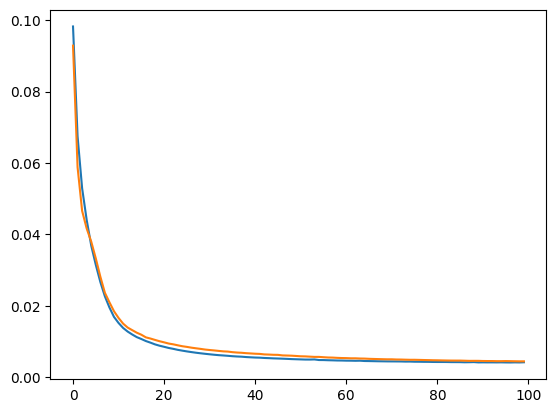

In [210]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])